In [1]:
# Load all necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import folium

from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

# Set matplotlib style

mpl.style.use('ggplot')

In [2]:
# Read the dataset to dataframe

df = pd.read_excel('online_retail_II.xlsx')

In [3]:
# Data observation

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
# Important notice: Price here is a Unit Price - Product price per unit in sterling

# Data observation

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
Invoice        525461 non-null object
StockCode      525461 non-null object
Description    522533 non-null object
Quantity       525461 non-null int64
InvoiceDate    525461 non-null datetime64[ns]
Price          525461 non-null float64
Customer ID    417534 non-null float64
Country        525461 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


Notice that there is 417 534 intries in 'Cutomer ID' column when the total number is 525 461.<br>
As well as Description - 522 533 / 525 461<br>
Other features look complete

In [5]:
df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,525461.0,525461,522533,525461.000000,525461,525461.000000,417534.000000,525461
unique,28816.0,4632,4681,NaN,25296,NaN,NaN,40
top,537434.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-06 16:57:00,NaN,NaN,United Kingdom
freq,675.0,3516,3549,NaN,675,NaN,NaN,485852
first,NaN,NaN,NaN,NaN,2009-12-01 07:45:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2010-12-09 20:01:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,10.337667,NaN,4.688834,15360.645478,NaN
std,NaN,NaN,NaN,107.424110,NaN,146.126914,1680.811316,NaN
min,NaN,NaN,NaN,-9600.000000,NaN,-53594.360000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13983.000000,NaN


Here we see that the dataset contains number of outliers in 'Quantity' and 'Price' columns.

In [6]:
# Let's take a look on NaN's in the 'Customer ID' columns

df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [7]:
# Take arbitrary Invoice number and check if it has a 'Customer ID' non-NaN value in a row.

df[df['Invoice'] == 489548].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom
1059,489548,22131,FOOD CONTAINER SET 3 LOVE HEART,2,2009-12-01 12:32:00,1.95,NaN,United Kingdom


Unfortunately, other observations of the given invoice number are also NaNs. <br>
In order to preserve all data, I will fill 'Customer ID' NaNs with zeros and 'Description' with 'no description'

In [8]:
df['Customer ID'].replace(np.nan, 0, inplace=True)
df['Description'].replace(np.nan, 'no description', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
Invoice        525461 non-null object
StockCode      525461 non-null object
Description    525461 non-null object
Quantity       525461 non-null int64
InvoiceDate    525461 non-null datetime64[ns]
Price          525461 non-null float64
Customer ID    525461 non-null float64
Country        525461 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


Now the dataset is full.

To answer the first question I will add some columns: Year and Quarter.<br>
This will help me to evaluate transactions yearly and quarterly.

In [10]:
df['Year'] = df['InvoiceDate'].dt.year

df['Quarter'] = df['InvoiceDate'].dt.quarter

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Quarter
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,4
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,4
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,4
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,4


Looks awesome.<br>
Now it's time to read carefully the Data Set Description and notice that invoices that start with 'C' letter, indicate cancellation. <br> No transaction - no money. No money - no honey and we will not consider it in our analysis.

In [11]:
#  Delete all invoices that start with 'C'

df_f = df[df['Invoice'].str[0] != 'C']

In [12]:
# Calculate new customers per Quarter

df_nc0 = df_f.loc[(df_f['Year'] == 2009) & (df_f['Quarter'] == 4)]
df_nc1 = df_f.loc[(df_f['Year'] == 2010) & (df_f['Quarter'] == 1)]
df_nc2 = df_f.loc[(df_f['Year'] == 2010) & (df_f['Quarter'] == 2)]
df_nc3 = df_f.loc[(df_f['Year'] == 2010) & (df_f['Quarter'] == 3)]
df_nc4 = df_f.loc[(df_f['Year'] == 2010) & (df_f['Quarter'] == 4)]

def nc_set(d):
    return set(d['Customer ID'])

nc4 = nc_set(df_nc4) - nc_set(df_nc3) - nc_set(df_nc2) - nc_set(df_nc1) - nc_set(df_nc0)
nc3 = nc_set(df_nc3) - nc_set(df_nc2) - nc_set(df_nc1) - nc_set(df_nc0)
nc2 = nc_set(df_nc2) - nc_set(df_nc1) - nc_set(df_nc0)
nc1 = nc_set(df_nc1) - nc_set(df_nc0)
nc0 = nc_set(df_nc0)

# Create index for new customers table
leftindex = pd.MultiIndex.from_tuples([(2009, 4), (2010, 1), (2010, 2), (2010, 3), (2010, 4)], names=['Year', 'Quarter'])

# Create new customers dataframe
nc = pd.DataFrame({'new_cust' : [len(nc0), len(nc1),len(nc2),len(nc3),len(nc4)]}, index=leftindex)

In [13]:
# Calculate summary of 'Quantity' and 'Price' columns quarterly
df_pq = df_f.groupby(['Year', 'Quarter'], as_index=True).sum()

# Add percent change columns for 'Quantity' and 'Price'
df_pq['P'] = df_pq['Price'].pct_change()
df_pq['Q'] = df_pq['Quantity'].pct_change()


# Join new customers columns
df_pq = df_pq.join(nc)
df_pq['С'] = df_pq['new_cust'].pct_change()
df_pq

Quantity       Price   Customer ID         P         Q  \
Year Quarter                                                           
2009 4          430106  187800.710  4.761714e+08       NaN       NaN   
2010 1         1248461  455334.429  1.184842e+09  1.424562  1.902682   
     2         1142910  408295.822  1.334955e+09 -0.103306 -0.084545   
     3         1340473  387705.431  1.351713e+09 -0.050430  0.172860   
     4         1483509  599404.502  1.917981e+09  0.546031  0.106706   

              new_cust         С  
Year Quarter                      
2009 4             956       NaN  
2010 1            1202  0.257322  
     2             818 -0.319468  
     3             591 -0.277506  
     4             748  0.265651

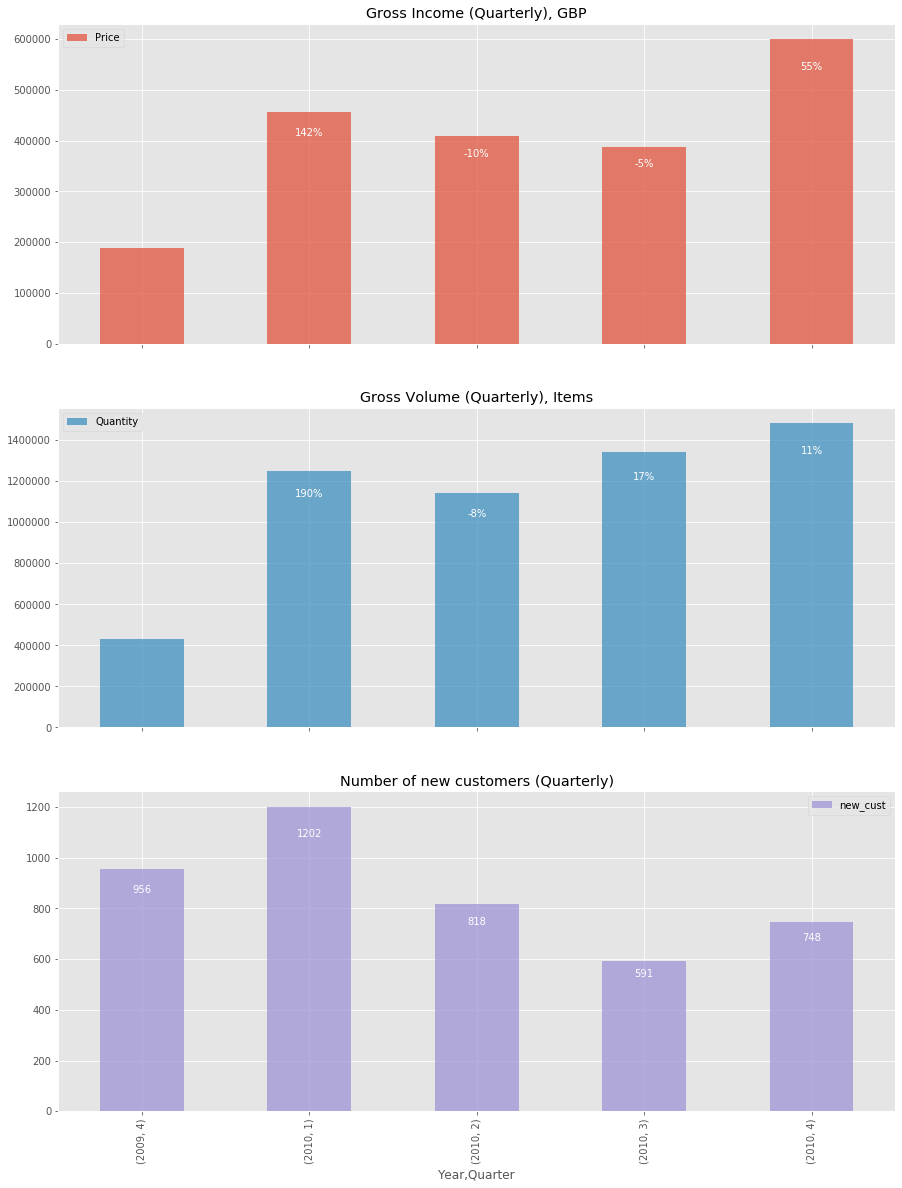

In [14]:
# Time to plot it:

cols_plot = ['Price', 'Quantity', 'new_cust']
cols_annot = ['P', 'Q', 'new_cust']

axes = df_pq[cols_plot].plot(kind='bar', alpha=0.7, figsize=(15, 20), subplots=True)

# Add titles to the plots
for i, ax in enumerate(axes):
    t = ['Gross Income (Quarterly), GBP', 'Gross Volume (Quarterly), Items', 'Number of new customers (Quarterly)']
    ax.title.set_text('{}'.format(t[i]))
    
# Add values to the each bar
    for k, v in enumerate(zip(df_pq[cols_plot[i]],df_pq[cols_annot[i]])):
        if i == 2: # exception for new customers colums
            ax.annotate(v[0], xy=(k, v[0]-v[0]*0.1), ha='center', color='white')
        else:
            if k != 0: # exception for the first observation in 'Quantity' and 'Price' columns
                ax.annotate('{0:0.0f}%'.format(v[1]*100), xy=(k, v[0]-v[0]*0.1), ha='center', color='white')

    
plt.show()

<h3>Answer on "how did we do?"</h3>

According to the given data, our company experienced 55% growth in the total price of all invoices (Gross Income) in Q4 compared to Q3.<br>

This growth was the first in the year after two straight decreasing quarters. Since our company is an all-occasion gift-ware seller, this increase can be explained by the winter holidays when people spend most on this stuff.

On the other hand, our Gross Volume steadily increase over the 2010 starting with Q3 and reached 1'400'000 sold items by in Q4.

Uncertainty in new customers dynamics does not add optimism. Even though the Q4 showed growth, the rest of the year we see a decreasing trend.

To conclude, the situation with new customers flow is warning but not critical. The marketing department should pay more attention to new clients drawing programs and broad the distribution area outside the EU. In general, Gross Income and Gross Volume increase in Q4 2010 more than twice compared to Q4 2009 and further prospective looks promising.

All these can witness a good company's health but additional data is crucial to make a final conclusion.

What we need more are:
    - another full-year period to compare and try to determine seasonality of the business
    - the profitability of each transaction
    - other corporate quarterly expenses


<h3>Segmentation</h3>

In this report I want to explore four kinds of segmentation:
1. Geographical. To indicate top buying countries (probably, to increase ad activity there)
2. Frequency. I want to determine and split customers by their activity over the year (to reward the most active ones)
3. Lost customers detection. To select those customers who committed a purchase two quarters ago and never bought anything since then (here we could try to return them that is less expensive than attracting new ones)
4. K-means Clustering, unsupervised machine learning algorithm. To segment customers on their average invoice value and volume.

<h5>Segmentation #1. Geographical

In [15]:
# Clean up the dataset to remove unnecessary columns (eg. REG) 
df_m = df_f.drop(['Description','Quarter','Year', 'Customer ID'], axis=1)

# Reaname EIRE to Iraland
df_m.loc[df_m['Country'] == 'EIRE', 'Country'] = 'Ireland'

# Group the table by 'Country' column and calsulate total sums for 'Quantity' and 'Price'
df_m = df_m.groupby('Country', as_index=True).sum()

df_m.head()

,Quantity,Price
Country,,
Australia,20189,2917.37
Austria,6697,2253.81
Bahrain,1025,348.67
Belgium,12075,5631.83
Bermuda,2798,84.70


Now let's use bar plot to show the data

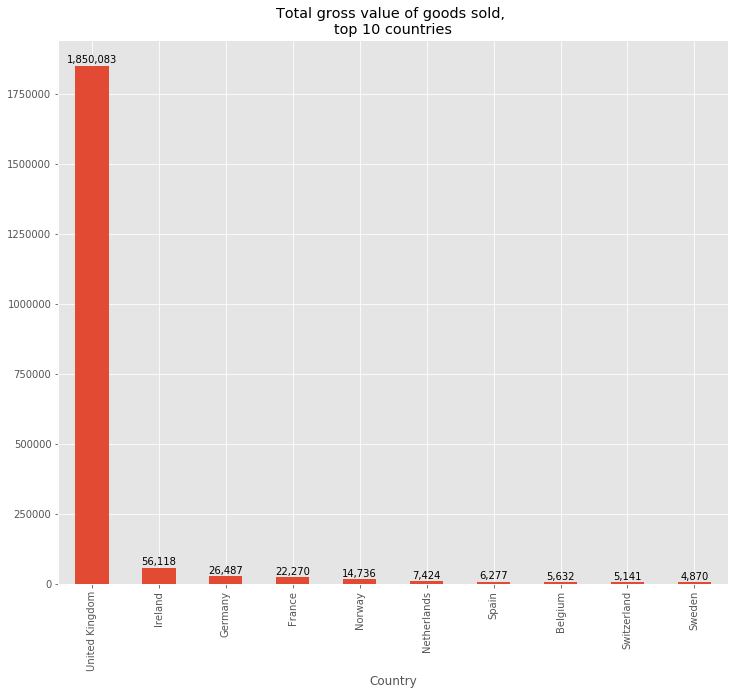

In [16]:
df_s1 = df_m.sort_values('Price', ascending=False).head(10)

df_s1['Price'].plot(kind='bar', subplots=True, figsize=(12,10))
plt.title('Total gross value of goods sold, \ntop 10 countries')

for k, v in enumerate(df_s1['Price']):
    plt.annotate("{:,}".format(round(v)), xy=(k, v+10000), ha='center', color='black')

plt.show()

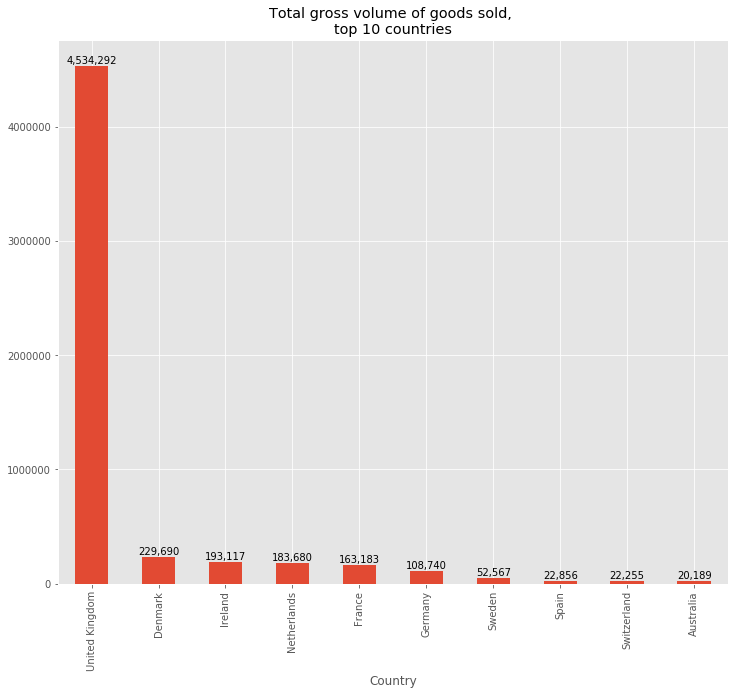

In [17]:
df_s2 = df_m.sort_values('Quantity', ascending=False).head(10)

df_s2['Quantity'].plot(kind='bar', subplots=True, figsize=(12,10))
plt.title('Total gross volume of goods sold, \ntop 10 countries')

for k, v in enumerate(df_s2['Quantity']):
    plt.annotate("{:,}".format(round(v)), xy=(k, v+20000), ha='center', color='black')

In [18]:
# Exclude UK to closer see other countries
df_m1 = df_m.sort_values('Quantity', ascending=False).head(10).iloc[1:,:]

df_m1.reset_index(level=0, inplace=True)


# Set json file path variable
world_geo = r'C:\Users\ms-msi\Desktop\Data Scientist\eDX\world_countries.json' # geojson file

# Create a plain world map
world_map = folium.Map(location=[45, 0], zoom_start=3, tiles='Mapbox Bright')

# Generate choropleth map using the total gross volume of goods sold
world_map.choropleth(
    geo_data=world_geo,
    data=df_m1,
    columns= ['Country', 'Quantity'],
    key_on='feature.properties.name',
    fill_color='YlGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Top 9 distribution countries (except UK)'
)

# display map
world_map

<b>Conclusion</b>

Customers from the following countries are the most active:

In [19]:
P = df_s1.index.to_list()
Q = df_s2.index.to_list()
set(P+Q)

{'Australia',
 'Belgium',
 'Denmark',
 'France',
 'Germany',
 'Ireland',
 'Netherlands',
 'Norway',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom'}

Consequently, here we can conduct supporting advertising campaigns. that is relatively not expensive.

Conversely, the countries outside this list need to be undergone aggressive ads.

<h5>Segmentation #2. Purchase frequency

In [20]:
df_a = df_f.loc[:,['Invoice', 'StockCode', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country']]
df_a.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Since the dataset does not have the attributes we need, let's o some preprocessing

In [21]:
df_a['c'] = 1

df_a1 = df_a.groupby('Invoice', as_index=False).sum()

df_a1['Customer ID'] = df_a1['Customer ID'] / df_a1['c']

# Delete observations with no customer ID value
df_a1 = df_a1.loc[df_a1['Customer ID'] > 0]

a1 = df_a1['Customer ID'].value_counts().to_frame()

In [22]:
a1.reset_index(level=0, inplace=True)

In [23]:
a1.columns.values[0] = 'CustomerID'
a1.columns.values[1] = 'NumberInv'
a1.head(3)

,CustomerID,NumberInv
0,14911.0,205
1,17850.0,155
2,12748.0,144


We've got a dataframe with Customer IDs and number of invoices assigned to each.

Let's closely take a look at the data and smartly decide which borders are the best for customers segmentation on their purchase frequency:

In [24]:
a1.describe()

,CustomerID,NumberInv
count,4314.000000,4314.000000
mean,15348.880389,4.454103
std,1700.930104,8.168658
min,12346.000000,1.000000
25%,13883.250000,1.000000
50%,15348.500000,2.000000
75%,16833.750000,5.000000
max,18287.000000,205.000000


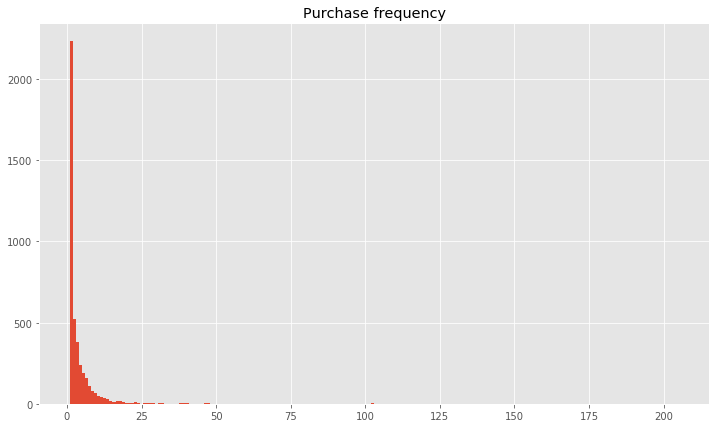

In [25]:
a1.iloc[:,1].hist(bins=200, figsize=(12,7))
plt.title('Purchase frequency')
plt.show()

<b>Conclusion</b>

From the information we've got, I see that the best splitting borders are 25%, 75% percentiles. 

Thus,

<b>Group1 : 1 Invoice</b>
. These customers made just a single purchase in our store. They are either new or old who stopped buying our 
products for some reason.<br>

<b>Group2 : 2 < Invoices < 5</b>
. These are regular customers who like our company and make occasionally make purchases. We can offer them special deals and other bonuses for their loyalty.<br>

<b>Group3 : Invoices >= 5</b>
. Probably, these are our wholesale customers. Our goal is to foster them and do everything for their business development.<br>

<h5>Segmentation #3. Lost customers detection

In [26]:
# A bit of preprocessing
df_a2 = df_f.loc[:,['Invoice', 'StockCode', 'Quantity', 'Price', 'Customer ID', 'Country', 'Year', 'Quarter']]
df_a2['c'] = 1
df_a2 = df_a2.groupby('Invoice', as_index=False).sum()
df_a2['Customer ID'] = df_a2['Customer ID'] / df_a2['c']
df_a2['Year'] = df_a2['Year'] / df_a2['c']
df_a2['Quarter'] = df_a2['Quarter'] / df_a2['c']

# Also, we drop observations without Customer ID value
df_a2 = df_a2.loc[df_a2['Customer ID'] > 0]

# We mark customers 'new' if they invoice in from Q4 and Q3 2010, and 'old' if before
df_a2['ctype'] = np.where(((df_a2['Year'] == 2009) | (df_a2['Quarter'] <= 2)), 'old', 'new')

df_a2.head(2)

,Invoice,Quantity,Price,Customer ID,Year,Quarter,c,ctype
0,489434,166,32.65,13085.0,2009.0,4.0,8,old
1,489435,60,10.50,13085.0,2009.0,4.0,4,old


In [27]:
a2 = df_a2.groupby(['Customer ID'])

In [28]:
# Now let's apply a bit of Venn Diagram logic here
a2_old = df_a2.loc[df_a2['ctype'] == 'old']
a2_new = df_a2.loc[df_a2['ctype'] == 'new']
a2_o = a2_old['Customer ID'].to_list()
a2_n = a2_new['Customer ID'].to_list()
a2_o = set(a2_o)
a2_n = set(a2_n)

# Actually, the moment itself:
a2 = a2_o - a2_n

a2 = pd.DataFrame(a2).astype('int64').head()
a2.rename(columns = {0 : 'old_cust'}, inplace=True)
a2.head()

,old_cust
0,14338
1,16388
2,16390
3,14347
4,16397


<b>Conclusion</b>

That way we managed to obtain a list of customers who stopped purchasing in our store before the middle of 2010.

Our goal is to find out why they stopped and after we understand, attract them again offering the better conditions of whatever.

<h5>Segmentation #4. (customer Segmentation with K-Means)</h5>

k-means assume the variance of the distribution of each attribute (variable) is spherical; all variables have the same
variance;

In other words, we need all clusters to be spherical form.

In [29]:
# Customer Segmentation with K-Means Clustering
df_a3 = df_a2.loc[:,['Customer ID', 'Quantity', 'Price']]

df_a3 = df_a3.groupby('Customer ID', as_index=False).mean()

In [30]:
# Add new column - the product of mean 'Price' and mean 'Quantity' for each customer
# This will add additional information to the dataset

df_a3 = df_a3.loc[df_a3['Price'] > 0]
df_a3 = df_a3.loc[df_a3['Quantity'] > 0]

df_a3['Avg_Inv'] =  df_a3['Price'] * df_a3['Quantity']

df_a3.head()

,Customer ID,Quantity,Price,Avg_Inv
0,12346.0,6.363636,18.760,119.381818
1,12347.0,414.000000,81.475,33730.650000
2,12348.0,373.000000,14.390,5367.470000
3,12349.0,331.000000,291.780,96579.180000
4,12351.0,261.000000,49.460,12909.060000


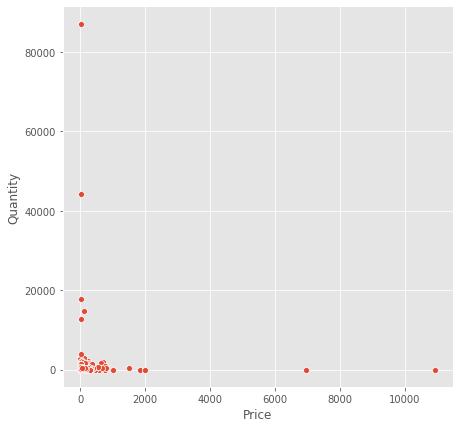

In [31]:
plt.figure(figsize=(7,7))
sns.scatterplot(x='Price', y='Quantity', data=df_a3)
plt.show()

A brief plot above does not help.

Now let's apply machine learning here and see how it will solve the problem.

In [32]:
# Uncomment to eliminate outliers
df_a3 = df_a3[(df_a3['Quantity'] < 10000) & (df_a3['Price'] < 1250)]

# Preprocessing before modeling

# Logarithmic transformation to cope with skewness
df_log = df_a3[['Quantity', 'Price', 'Avg_Inv']].apply(np.log, axis = 1).round(3)
df_log = df_log[np.isfinite(df_log['Price'])]

X = df_log.values
X = np.nan_to_num(X)

# Normalizing over the standard deviation
X_transf = StandardScaler().fit_transform(X)
X_transf

array([[-3.21522881, -0.92220603, -2.66801134],
       [ 1.08554067,  0.53619379,  1.04962122],
       [ 0.97840773, -1.18547302, -0.1610465 ],
       ...,
       [ 0.00494014,  0.74184009,  0.4950063 ],
       [ 0.76723222,  1.09650544,  1.21758655],
       [ 0.93205213,  0.2401426 ,  0.75518789]])

Let's assured that all kMean model's requirements are met:

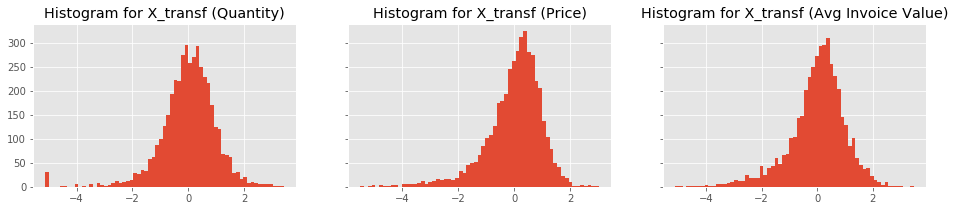

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(16, 3), sharey=True)
axs[0].hist(X_transf[:,0], bins='auto')
axs[0].set_title('Histogram for X_transf (Quantity)')
axs[1].hist(X_transf[:,1], bins='auto')
axs[1].set_title('Histogram for X_transf (Price)')
axs[2].hist(X_transf[:,2], bins='auto')
axs[2].set_title('Histogram for X_transf (Avg Invoice Value)')

plt.show()

The cell below is totally workable and it uses the DBSCAN algorithm to segment the data. Unfortunately, the data structure turned out in not the appropriate view to tackle it with DBSCAN. Probably, the clusters' densities are significantly different and, as a result, stated epsilon does not allow the machine to recognize some areas.

In [35]:
from scipy import stats

stats.describe(df_a3.Avg_Inv)

variance = 1804754140.0429707
variance2 = 1.0002325040688211

mean = 17590.98971453894
mean2=3.963976210656068e-16

from math import sqrt
print("variance before = %s" % sqrt(variance))
print("variance after = %s" % sqrt(variance2))
print("variation before = %s" % (sqrt(variance) / mean))
print("variation after = %s" % (sqrt(variance2) / mean2))

variance before = 42482.39800250182
variance after = 1.0001162452779282
variation before = 2.41500897288287
variation after = 2523012732996199.0


In [36]:
# from sklearn.cluster import DBSCAN 

# # Uncomment to model DBSCAN

# epsilon = 0.8 #determine a specified radius that if includes enough number of points within, we call it dense area
# minimumSamples = 4 #determine the minimum number of data points we want in a neighborhood to define a cluster.
# db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
# labels = db.labels_
# len(set(labels))

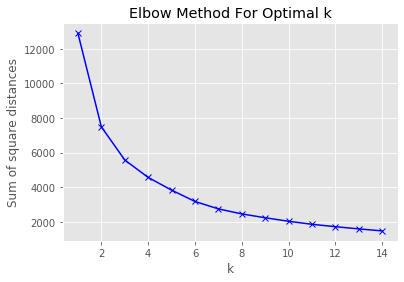

In [37]:
# Determine k
ss_dist = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_transf)
    ss_dist.append(km.inertia_)

# Plot the elbow
plt.plot(K, ss_dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of square distances')
plt.title('Elbow Method For Optimal k')
plt.show()

We'll take k=3

In [38]:
# Modeling kMeans

# I set 3 clusters but it perfectly works with any other number because all script below is scalable.
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 20)
k_means.fit(X_transf)
labels = k_means.labels_
# Assign cluster numbers to each row
df_a3['Cluster'] = labels

In [39]:
# Assign cluster numbers to each row
df_a3['Cluster'] = labels

In [40]:
df_a3.head()

,Customer ID,Quantity,Price,Avg_Inv,Cluster
0,12346.0,6.363636,18.760,119.381818,0
1,12347.0,414.000000,81.475,33730.650000,2
2,12348.0,373.000000,14.390,5367.470000,1
3,12349.0,331.000000,291.780,96579.180000,2
4,12351.0,261.000000,49.460,12909.060000,2


Now, the most interesting part in any clustering task - visualization

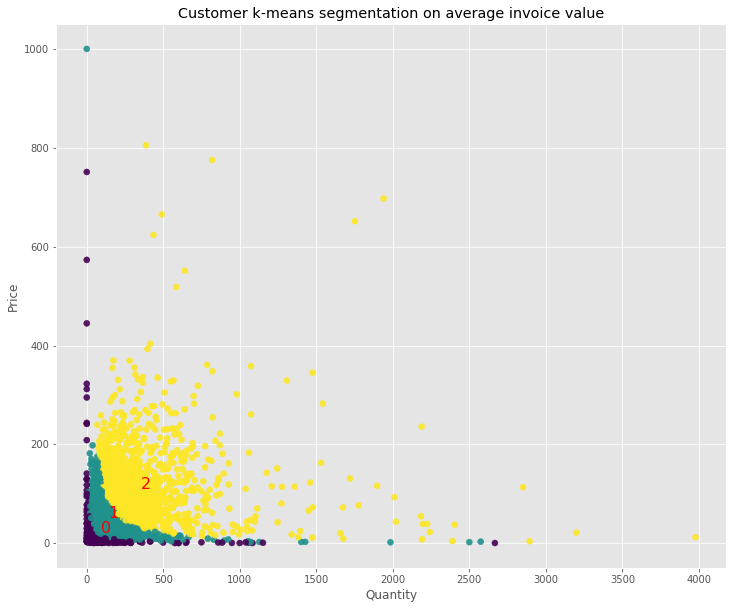

In [41]:
plt.figure(figsize=(12,10))
plt.scatter(df_a3.Quantity, df_a3.Price, c=labels.astype(np.float), alpha=0.9)
#             X[:, 0], X[:, 1], 
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Customer k-means segmentation on average invoice value')

# Add clusters' numbers
for clust_number in sorted(set(labels)):
    clust_set = df_a3[df_a3.Cluster == clust_number]
# This part is for DBSCAN, where outliers marked '-1'
    if clust_number != -1:
        cenx=np.mean(clust_set.Quantity) 
        ceny=np.mean(clust_set.Price) 
        plt.text(cenx,ceny,str(clust_number), fontsize=16, color='red',)
plt.show()

In [42]:
# Create a table with clusters' parameters
table = pd.DataFrame({'cluster' : ['cluster' + str(x) for x in sorted(set(labels))],
                     'Quantity (min)' : [round(df_a3.loc[df_a3['Cluster'] == i].Quantity.min(), 2) for i in sorted(set(labels))],
                     'Quantity (max)' : [round(df_a3.loc[df_a3['Cluster'] == i].Quantity.max(), 2) for i in sorted(set(labels))],
                     'Price (min)' : [round(df_a3.loc[df_a3['Cluster'] == i].Price.min(), 2) for i in sorted(set(labels))],
                     'Price (max)' : [round(df_a3.loc[df_a3['Cluster'] == i].Price.max(), 2) for i in sorted(set(labels))],
                     'Avg_Inv (min)' : [round(df_a3.loc[df_a3['Cluster'] == i].Avg_Inv.min(), 2) for i in sorted(set(labels))],
                     'Avg_Inv (max)' : [round(df_a3.loc[df_a3['Cluster'] == i].Avg_Inv.max(), 2) for i in sorted(set(labels))],
                     'Number of Customers' : [df_a3.loc[df_a3['Cluster'] == i]['Customer ID'].count() for i in sorted(set(labels))]})
table

,cluster,Quantity (min),Quantity (max),Price (min),Price (max),Avg_Inv (min),Avg_Inv (max),Number of Customers
0,cluster0,1.00,2666.67,0.19,751.49,2.95,1914.36,546
1,cluster1,1.00,2574.00,1.86,1000.63,1000.63,12424.89,2154
2,cluster2,69.67,3976.88,3.92,805.71,10396.50,1353421.89,1602


But what can be better than 2D plot? Sure, 3D!

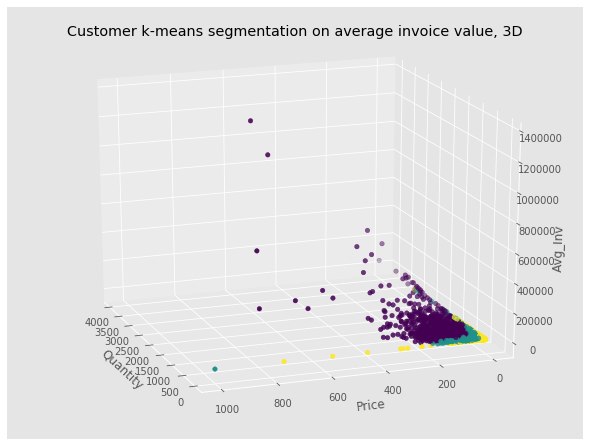

In [43]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=20, azim=160)

plt.cla()

ax.set_xlabel('Quantity')
ax.set_ylabel('Price')
ax.set_zlabel('Avg_Inv')

colormap = np.array([x*(-1) for x in sorted(set(labels))])

ax.scatter(df_a3.Quantity, df_a3.Price, df_a3.Avg_Inv, c = colormap[labels])
ax.set_title('Customer k-means segmentation on average invoice value, 3D')
plt.show()

<b>Conclusion</b>

Here we see how the kMeans conducted segmentation:
    
The first group, are customers who purchase either very few items or very cheap. As a whole, their contribution to our company's growth is not significant. The first group is a minority in the dataset.

The second group, are those whose contribution is more tangible and whose purchases' value is over the average level. They are probably average wholesalers. Interestingly, but this group is dominated here with a number of customers equaled 2156.

The third group plays the most significant role in the company's business. The customers' purchases from this group are both expensive and bulk and they are key customers for the company.

Overall, this completely correlates with the Data Description where it is said that "Many customers of the company are wholesalers."

<b>Why kMeans:</b>

1. This is fast to initialize and train
2. This is easy to visualize and explain

<b>What other data would help you better understand the segments?</b>

As I said above, the profitability of each transaction would be very helpful in the most profitable customers segmentation.

Also, kMeans segmentation could be conducted of many other parameters such as 'Top paying customers', 'Purchase Frequency' (as described above) and 'Time since the last order'.